# Исследование объявлений о продаже квартир

В В данном задании нам необходимо определить рыночную стоимость объектов недвижимости. 

 

# Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Разделим наше исследование на несколько важных шагов:

### Шаг 1. Изучение общей информации:


   * Изучение файлов с данными, получение общей информации, загрузка библиотек


### Шаг 2. Предобработка данных


   * определение и изучение пропущенных значений
   * поиск причины, которые могли привести к пропускам в данных.


### Шаг 3. Изучение и добавление в таблицу:

   * цены квадратного метра
   * день недели, месяц и год публикации объявления
   * этаж квартиры
   * соотношение жилой и общей площади, а также отношение площади кухни к общей.
   
### Шаг 4. Проведение исследовательского анализа данных:

   * Изучим таблицу по следующим параметрам: площадь, цена, число комнат, высота потолков.
   * Изучение время продажи квартиры. Определим сколько обычно занимает продажа. 
   * Подготовим таблицу убрав редкие и выбивающиеся значения.
   * Выясним факторы больше всего влияют на стоимость квартиры Узнаем, зависит ли цена от площади, числа комнат, удалённости от центра, а так же узнаем есть ли зависимости цены от того, на каком этаже расположена квартира или от даты размещения
   * Выделим 10 населённых пунктов с наибольшим числом объявлений и найдём среди них среди них населённые пункты с самой высокой и низкой стоимостью жилья. 
   * Изучим предложения квартир, а именно выделим сегмент квартир в Санкт-Петербурге которые входят в центр. Проанализируем эту территорию и выясним какие факторы влияют на стоимость квартиры


### Шаг 5. Общий вывод

   * Подведём итоги и выясним есть ли разница между квартирами в центре города и других районах города или области

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

Для начала откроем файл и ознакомимся с данными. Посмотрим из чего состоит наша таблица и есть ли там пропущенные значения.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image

In [2]:
df = pd.read_csv('C:/Users/User/real_estate_data.csv', sep='\t')

In [3]:
df.head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как видим, что пропущенных значений очень много. Для более лучшего восприятия вглянем на них.

array([<AxesSubplot:title={'center':'None'}>], dtype=object)

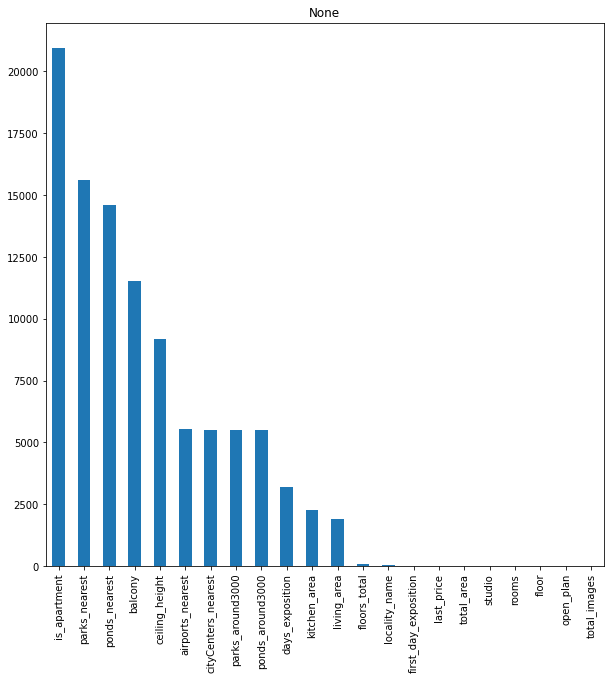

In [7]:
df.isnull().sum().sort_values(ascending = False).plot.bar(subplots=True, figsize=(10, 10))

Как можем заметить, что больше всего пропущенных значений в столбце is_apartment. из 23 тыс. у нас пропущено 21 тыс. Это ~ 90% пропусков. Так же не далеко ушли столбцы parks_nearest, ponds_nearest, balcony и ceiling_height. В следущем шаге будем смотреть на них лучше и выяснять что послужило причиной пропуска и можем ли мы как-то заменить их. Так же стоит обратить внимание, что в большинстве случаев наши пропуски лежат там, где данные получены автоматически и относятся к расстоянию. 

### Вывод

Итак, после первого взгляда на наши данные можно сделать выводы, что:

1. Очень много пропусков, почти в половине из всех столбцов в которых пропущеные значения могут достигать ~ 90% от всех значений.
2. Нечитабильно отображена дата. 
3. Колличество комнат отображено довольно странно. Минимальное колличество равное 0. Возможно, это студия, не так страшно. Но вот максимальный показатель говорит о том, что у нас 19 комнат при максимальной площади в 900 кв.м. Возьмём на заметку и просто посмотрим на эти данные. 
4. Высота потолков. Максимальное значение по нему аж 100 метров. Похоже кто-то лично отстроил себе одноэтажный небоскрёб. Но так же и минимальный говорит о том, что высота составляет 1 метр. Возможно, это фанат Властелина колец, а возможно, неверное отображение данных. Посмотрим. 
5. Максимальное колличество этажей равняется 60. Довольно странная цифра. Обратимся к google, чтобы убедиться, что это верные показатели. По нашему запросу самым большим ЖК является «Князь Александр Невский» с максимальным колличеством в 37 этажей, т.к. в данной выборке представлены исключительно жилые помещения, то данная цифра всё более кажется нереалистичной. Так же обратим внимание, что в нашей выборке представлены объявления в которых максимальный этаж на котором продаётся квартира равняется 33. 

После первого взгляда на наши данные появляется всё больше и больше вопросов. Но прежде чем, проводить какие-либо исследовательские работы для начала надо разобраться с пропусками, а после посмотреть на наши выбросы и решить, что с ними делать.
    

### Шаг 2. Предобработка данных

Для начала начнём с тех пропущенных значений, которые были добавлены в ручную и начнём с самого большого пропуска

In [8]:
df.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [9]:
df.query('is_apartment == True').head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.30,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.39,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.00,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.80,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.00,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [10]:
df.query('is_apartment == False').head(25)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.0,18,False,...,15.0,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,NaN,19.0,52.0,15,False,...,11.0,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,NaN,9.0,27.0,9,False,...,6.3,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.0,8,False,...,12.0,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.9,2,False,...,17.6,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.70,5.0,25.4,4,False,...,9.0,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
56,14,4350000.0,41.0,2016-03-28T00:00:00,1,2.80,7.0,18.1,4,False,...,11.1,2.0,Санкт-Петербург,13772.0,9626.0,1.0,271.0,1.0,439.0,152.0
66,6,3450000.0,34.0,2015-12-16T00:00:00,1,2.60,17.0,17.4,8,False,...,11.5,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
69,6,4010000.0,50.7,2018-09-16T00:00:00,2,2.60,5.0,28.9,5,False,...,9.0,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,194.0


Как видим, что ничего. Все данные варьируются и представлены по-разному. Далее будем полагаться на интуицию и предположим, что человек намеренно не указал является ли его квартира аппартаментами или нет, т.к. не знаком с таким типом недвижимости. Человек, который владеет аппартаментами явно знает, что это за тип недвижимости. Отсюда следует логика, что пропущенные данные можно заменить на False, но тогда у нас останется всего 50 объектов недвижимости, которые являются аппартаментами, что является существенно мало.  Итак, прежде чем, приступать к замене обратимся к нашим коллегам - аналитикам и посмотрим в интернете публичные отчёты, чтобы выяснить какую долю рынка недвижимости занимает данная категория. 

Изучив некоторые отчёты можно понять, что на рынке Санкт - Петербурга доля аппартаментов составляет не более 8%, что говорит о том, что данный тип недвижимости не особо популярен. Но т.к. эти данные просто служат нашим ориентиром, то следует предположить, что вполне вероятно, что из 23 тыс. объявлений на рынке может присустсвовать всего лишь 50 объявлений такого типа, а так же, что человек, владеющий аппартаментами явно указал бы это в объявлении. Поэтому меняем пропущенные показатели на False и переходим к следующему шагу.


In [11]:
df.is_apartment = df.is_apartment.fillna(False)

In [12]:
df.is_apartment.value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Так же как мы можем видеть у нас в датафрейме представлены столбцы с пропущенными значениями в которых лежат данные о расстоянии, т.к. данные получены автоматически, то вряд ли мы как-то можем повлиять на эти результаты и пока перейдём к тем слобцам, где мы можем на что-то повлиять. Вглянем на балконы.

In [13]:
df.balcony.value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [14]:
df.query('balcony != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.00,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,False,...,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,False,...,9.1,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,False,...,10.6,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.0,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0


In [15]:
df.query('balcony == "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,False,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,False,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,False,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,False,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как мы видим, что какой-либо логической взаимосвязи между данными опять же нет. Как искать пропущенные балконы? Положимся опять на интуицию и логику. Сейчас актуальна тендеция строить новые дома без балконов. Почему? Сейчас возводятся дома новейших серий, проектируемые по европейским стандартам, не предусматривающим балконы в качестве обязательных элементов жилья,а так же балконы служат как дополнительные пути эвакуации, а значит, к их обустройству предъявляются строгие технические требования. Вместо них сейчас застройщик предлагает или лоджию или посторную кладовую, т.к. балкон и лождия являются разными вещами, то скорее всего пропущенные значения это либо:

    1. лождия
    2. его отсутствие
    
Исходя из этой логики мы можем заменить пропущенные значения на 0, что значит, что в данном доме нет балкона, либо есть какая-то другая альтернатива. Так же приведём балконы к целочисленному типу данных.

In [16]:
df.balcony = df.balcony.fillna(0)

In [17]:
df.balcony = df.balcony.astype(int)

Теперь посмотрим на то, что не так с нашими полотками. Отфильтруем все значения, в которых высота потолка больше 6. Почему именно 6? Стандартом считается высота потолка в районе 2.7 или 3.0. Если это двухуровневая квартира, то эти показатели умножим на 2 и отсюда возникает цифра 6.

Раз мы начали менять тип данных, то поменяем его и для столбца floors_total.

In [18]:
df.query('ceiling_height > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,0,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,False,...,7.0,1,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,False,...,NaN,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,0,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,False,...,7.0,2,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,False,...,8.3,1,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


Изучив таблицу, можно понять, что скорее всего при заполнении данной ячейки была ошибка и человек забыл разделить числа запятой. т.е. там где 25, то это скорее всего 2.5, а где 32, то там 3.2. Интересует несколько показателей. Высота потолка может достигать до 10 м, если это двухуровневая элитная квартира, но вот 16 метров уже достаточно много, так же как и 1.6 слишком низко. Итак, расчитаем медианное значение и заполним пропуски

In [19]:
df.ceiling_height.median()

2.65

In [20]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = 2.7

In [21]:
df.ceiling_height = df.ceiling_height.fillna(2.7)

In [22]:
df.ceiling_height.isnull().sum()

0

Итак, прежде чем приступить к дальнейшим заполнениям, рассчитаем какой % от общей площади у нас составляет жилая площадь, площадь кухни и нежилая площадь (сан.узлы, кладовые). Для начала отберём значения, где у нас указаны все 3 значения:

1. жилая площадь
2. площадь кухни
3. общая площадь

После этого найдём сколько в совокупности % от общей площади они составляют и уже из полученных данных увидим какой % остается на нежилую площадь.

In [23]:
something = df.query('living_area != "NaN" & kitchen_area != "NaN"')

In [24]:
df.query('living_area != "NaN" & kitchen_area != "NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.70,11.0,18.6,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,12.0,14.4,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.70,5.0,17.5,4,False,...,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,False,...,8.00,0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,False,...,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.70,5.0,38.0,4,False,...,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [25]:
s = (something.living_area + something.kitchen_area) / something.total_area

In [26]:
s.median()

0.75

In [27]:
s.mean()

0.7494943137617875

Как видим, что на жилую площадь и кухню приходится 75% от общей площади квартиры, т.е. 25% занимает всё остальное. Кладовые, сан.узлы и прочее. После того, как мы получили все интересующие нас показатели рассчитаем для каждого показателя его % от общей площади.

In [28]:
s1 = (something.total_area * 0.25 + something.kitchen_area) / something.total_area

In [29]:
s1.mean()

0.4369665499191925

In [30]:
s1.median()

0.421875

Нежилая площадь и кухня вместе занимают ~ 44% от общей площади, значит 56% приходится на жилую. Далее найдём какой % занимает кухня.

In [31]:
s2 = (something.total_area * 0.25 + something.living_area) / something.total_area

In [32]:
s2.median()

0.8164556962025316

In [33]:
s2.mean()

0.8125277638426038

Жилая площадь и не жилая вместе занимают ~81%, следовательно 19% занимает площадь кухни.

Итак, мы можем сделать вывод, что:

    1. жилая площадь составляет 56% от общей площади
    2. прочая площадь (сан.узлы, кладовые) 25% от общей площади
    3. площадь кухни 19% от общей площади

После того как мы выясняли какой % от общей площади занимает каджый вид площади произведём замену пустых значений.

In [34]:
df.living_area = df.living_area.fillna(df.total_area * 0.56)

In [35]:
df.kitchen_area = df.kitchen_area.fillna(df.total_area * 0.19)

In [36]:
df.kitchen_area.isnull().sum()

0

In [37]:
df.living_area.isnull().sum()

0

Отлично. От этих пропусков избавились. Теперь округлим их до 1 точки после запятой и попробуем выяснить, что послужило причиной пропуска в days_exposition, но для начала приведём столбец first_day_exposition к читабельному виду. т.к. часы, минуты и секунды нас не интересуют и не имеют каких-либо значений, то избавимся от них, оставив лишь только год, месяц и день

In [38]:
df = df.round({'living_area': 1, 'kitchen_area': 1, 'total_area': 1})

In [39]:
df.first_day_exposition = pd.to_datetime(df.first_day_exposition, format='%Y-%m-%dT')

In [40]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.0,9,False,...,30.2,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Предположим, что пропущенные значения говорят о том, что данные объявления всё ещё висят на доске объявлений и квартира не продаётся, либо квартиру только выставили на продажу. Посмотрим для начала на эти квартиры.

In [41]:
df.query('days_exposition =="NaN"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18,2,2.70,24.0,40.1,22,False,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18,1,2.70,22.0,22.4,3,False,...,7.6,1,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02,2,2.65,9.0,30.3,7,False,...,7.0,0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31,2,2.60,24.0,29.7,9,False,...,8.3,2,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02,4,3.00,26.0,71.4,17,False,...,15.6,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24,1,2.50,5.0,17.3,5,False,...,5.6,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.8,2017-03-21,3,3.70,5.0,73.3,3,False,...,13.8,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.7,2018-02-11,2,2.70,3.0,29.7,1,False,...,10.8,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видим, что есть разные даты публикации и разные суммы. Поэтому оставим предположение, что данные объявления всё ещё актуальны и не сняты с публикации. Поэтому пустые значения так и оставим пустыми

### Вывод

Итак, мы заполнили:

    1. пустые значения в жилой площади и площади кухни, исходя из доли данной переменной.
    2. Пустые значения в столбце высота потолка исходя из медианного значения.
    3. Изменили формат времени на удобный для чтения.
    4. Пропуски в столбце балконы, полагаясь на логику и интуицию.

Остались данные, которых пустые значения мы обработать не сможем, например, данные о расстоянии, которые были получены автоматически при помощи каких-либо сервисов или, например, вряд ли мы сможем узнать сколько максимум этажей в этом здании, т.к. нет ни адреса, ни любых других значений по которым мы могли бы предположить. либо нам просто незачем менять значения, например, есть ли парк рядом или нет никакой роли в наших исследованиях не играет.

### Шаг 3. Посчитайте и добавьте в таблицу

Итак, приступим к следующим шагам и добавим в нашу таблицу:
    
    1. цену квадратного метра
    2. день недели, месяц и год публикации объявления
    3. этаж квартиры; варианты — первый, последний, другой
    4. соотношение жилой и общей площади, а также отношение площади кухни к общей

Для начала получим для каждого объявления сколько стоит 1 кв.м. его квартиры и добавим в таблицу.

In [42]:
df['price_for_m2'] = df.last_price // df.total_area

In [43]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.0,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0


Далее добавим столбцы с днём недели, месяцем и годом публикации, где:

    0 = понедельник
    1 = вторник
    2 = среда
    3 = четверг
    4 = пятница
    5 = суббота
    6 = воскресенье
А так же месяц публикации и год публикации в отдельные столбцы

In [44]:
df['weekday_of_publication'] = df.first_day_exposition.dt.weekday

In [45]:
df['year_of_publication'] = df.first_day_exposition.dt.year

In [46]:
df['month_of_publication'] = df.first_day_exposition.dt.month

In [47]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_publication,year_of_publication,month_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.0,3,2019,3
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.0,1,2018,12
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.0,3,2015,8
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.0,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.0,4,2015,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,1,2018,6


Отлично, теперь добавим тип этажа

In [48]:
df.loc[df['floor'] == 1, 'type_floor'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'type_floor'] = 'последний'
df.loc[df['type_floor'].isna(), 'type_floor'] = 'другой'

In [49]:
df.type_floor.value_counts()

другой       17446
последний     3361
первый        2892
Name: type_floor, dtype: int64

Теперь добавим соотношение жилой и общей площади, а также отношение площади кухни к общей

In [50]:
df['living_ratio'] = df.living_area / df.total_area

In [51]:
df['kitchen_ratio'] = df.kitchen_area / df.total_area

In [52]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_publication,year_of_publication,month_of_publication,type_floor,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,120370.0,3,2019,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.70,11.0,18.6,1,False,...,0.0,NaN,81.0,82920.0,1,2018,12,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,2.0,574.0,558.0,92785.0,3,2015,8,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,89.0,9,False,...,3.0,234.0,424.0,408176.0,4,2015,7,другой,0.559748,0.189937
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,100000.0,1,2018,6,другой,0.320000,0.410000


### Вывод

Итак, мы добавили:
1. столбец с ценой одного квадратного метра
2. столбец день недели, месяц и год публикации объявления
3. столбец, где этаж квартиры: первый, последний, другой
4. столбец с соотношением жилой и общей площади, а также отношением площади кухни к общей
    

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Построим гистрограммы, чтобы изучить площадь, цену, число комнат и высота потолков.

Text(0, 0.5, 'колличество объявлений')

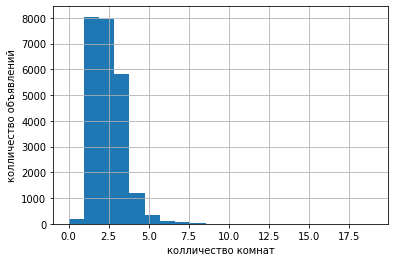

In [53]:
ax = df.rooms.hist(bins=20)
ax.set_xlabel('колличество комнат')
ax.set_ylabel('колличество объявлений')

[Text(0.5, 0, 'колличество комнат')]

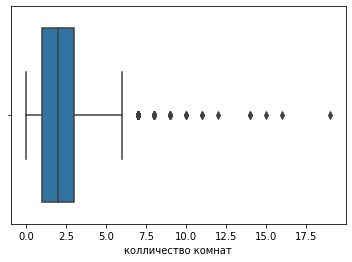

In [54]:
sns.boxplot(df.rooms).set(xlabel='колличество комнат')

Можно заметить, что наиболее популярны квартиры с 2 или 3 комнатами, далее по популярности идут либо однокомнатные, либо студии. Так же можно заметить, что есть и выбросы, что есть объявления, где комнаты первышают 6! Больше похоже, что мы изучаем декларацию чиновника нежели объявеления на сайте.

Text(0, 0.5, 'колличество объявлений')

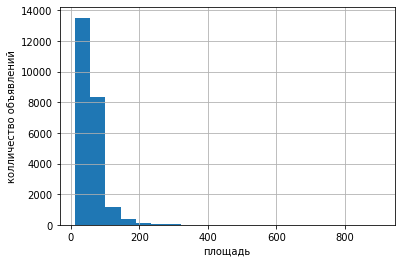

In [55]:
ax = df.total_area.hist(bins=20)
ax.set_xlabel('площадь')
ax.set_ylabel('колличество объявлений')

[Text(0.5, 0, 'площадь квартиры(кв.м)')]

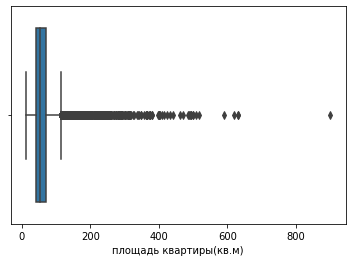

In [56]:
sns.boxplot(df.total_area).set(xlabel='площадь квартиры(кв.м)')

Тут можно заметить, что практически все объявления лежат в значенийй от 10 до 100 кв.м. И не так много значений, которые достигают до 200 кв.м. И естественно редкие значения, где значения лежат больше 500 кв.м.

Text(0, 0.5, 'колличество объявлений')

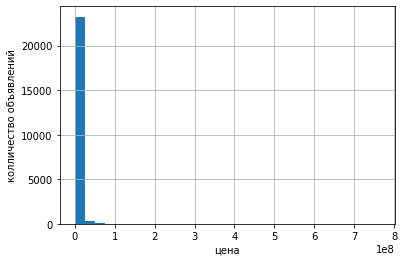

In [57]:
ax = df.last_price.hist(bins=30)
ax.set_xlabel('цена')
ax.set_ylabel('колличество объявлений')

[Text(0.5, 0, 'цена за квартиру(млн)')]

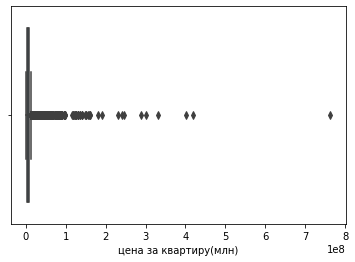

In [58]:
sns.boxplot(df.last_price).set(xlabel='цена за квартиру(млн)')

Тут вообще ничего не понятно. Разобьём на категории и вглянем уже по ним какая цена и сколько в среднем стоят квартиры.

In [59]:
def change(row):
    income = row['last_price']
    if income < 1000000.0:
        return 'до 1 млн'
    if 1000000.0 < income < 2000000.0:
        return 'от 1 до 2 млн'
    if 2000000.0 < income < 3000000.0:
        return 'от 2 до 3 млн'
    if 3000000.0 < income < 4000000.0:
        return 'от 3 до 4 млн'
    if 4000000.0 < income < 5000000.0:
        return 'от 4 до 5 млн'
    if 5000000.0 < income < 6000000.0:
        return 'от 5 до 6 млн'    
    if income > 7000000.0:
        return 'свыше 7 млн'        

In [60]:
df['category_price'] = df.apply(change, axis = 1)

In [61]:
df.groupby('category_price', as_index=False)[['last_price']]\
    .count().sort_values('last_price', ascending=False)\
    .style.bar()

,category_price,last_price
6,свыше 7 млн,5432
3,от 3 до 4 млн,4668
4,от 4 до 5 млн,4132
5,от 5 до 6 млн,2794
2,от 2 до 3 млн,2534
1,от 1 до 2 млн,1129
0,до 1 млн,225


In [62]:
df.last_price.median()

4650000.0

Видим,что больше всего объявлений лежит свыше 7 млн, а в среднем квартира стоит 4,5 млн. руб.

Text(0, 0.5, 'колличество объявлений')

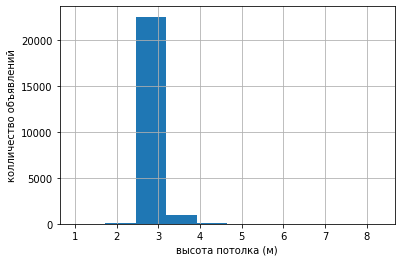

In [63]:
ax = df.ceiling_height.hist()
ax.set_xlabel('высота потолка (м)')
ax.set_ylabel('колличество объявлений')

Здесь видим, что в основном высота потолка идёт от 2 до 3 метров, и не так много где 4 метра, а дальше уже какие-то уникальные квартиры.

После изучения данных гистрограмм можно сделать вывод, что практически в каждой таблице есть выбросы, но при этом:
    
    1. Высота потолка в основном между 2.5 и 3.2 м.
    2. Больше всего квартир стоимостью от 4 млн. и средняя стоимость квартиры составляет 4.5 млн. руб.
    3. Площадь составляет от 10 до 150 кв.м.
    4. Больше всего комнат от 2 до 4, но так же достаточно много студий.

Теперь посмотрим сколько в среднем продаётся квартира. Для начала уберём из нашего датафрейма пустые значения и посмотрим уже по известным нам днях и продаже.

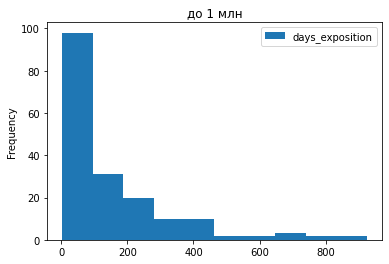

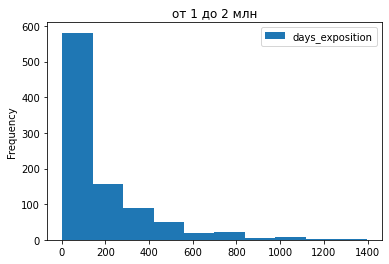

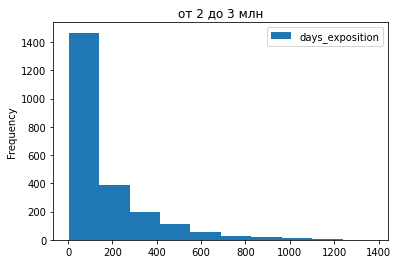

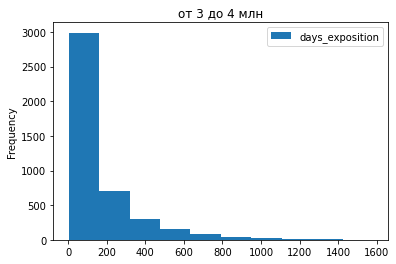

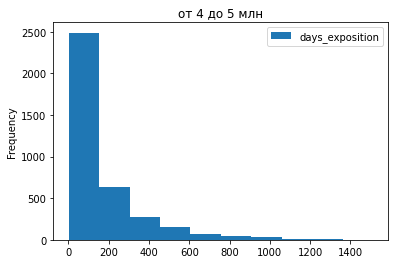

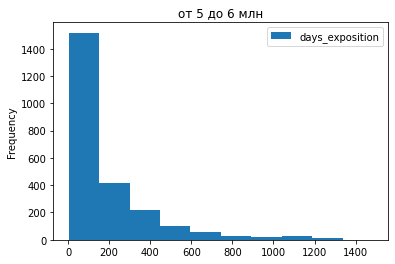

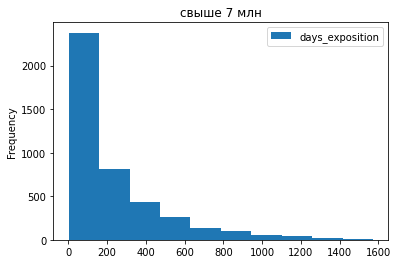

In [64]:
good_data = df.query('days_exposition != "NaN" & days_exposition > 1')
for  name, group_data in good_data.groupby('category_price'):        
    group_data.plot(kind='hist', y='days_exposition', title=name)  

Видим, что основные продажи происходят в первые 100 дней какова бы цена не была у квартиры. Далее посмотрим сколько в среднем продаётся квартира. Какие квартиры продаются быстрее всего, а какие дольше.

In [65]:
good_data.pivot_table(index='category_price', values='days_exposition', aggfunc=['count','median','mean'])

,count,median,mean
,days_exposition,days_exposition,days_exposition
category_price,,,
до 1 млн,180,82.0,155.888889
от 1 до 2 млн,932,96.5,175.884120
от 2 до 3 млн,2287,87.0,162.281592
от 3 до 4 млн,4319,80.0,158.203519
от 4 до 5 млн,3712,88.0,162.268319
от 5 до 6 млн,2404,95.0,183.814892
свыше 7 млн,4269,131.0,234.613961


Можно заметить, что в среднем квартиры продаются от 80 до 90 дней, но судя по среднему значению, то оно отличается в 2 раза, что говорит о том, что в кажой группе есть квартиры, которые продаются очень долго

Итак, можно сделать вывод, что дольше всего продаются квартиры стоимостью свыше 7 млн., а быстрее всего квартиры, чья стоимость варьируется в диапазоне от 3 до 4 млн.

Теперь посмотрим сколько в среднем вообще продаётся квартира.

<AxesSubplot:>

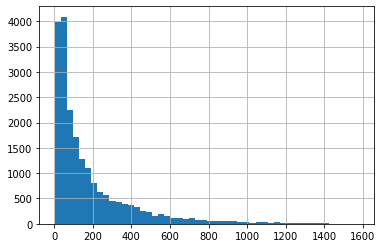

In [66]:
good_data.days_exposition.hist(bins=50)

<AxesSubplot:xlabel='days_exposition'>

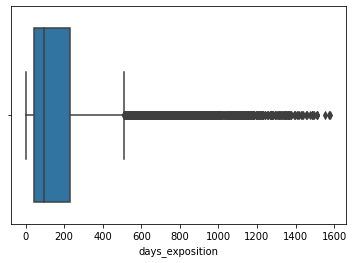

In [67]:
sns.boxplot(good_data.days_exposition)

Как видим, что такой показатель независит от категории цены. Почти все квартиры продаются в среднемм за 95 дней, что для продажи недвижимости является нормой, но по боксплоту можем увидеть, что свыше 500 дней уже является выбросом и можно сделать вывод, что это необычайно долго. Так же можем заметить, что продажи в первые 50 дней необычайно быстро для квартиры.

Итак, подготовим нашу таблицу для дальнейших исследований и избавимся от редких и выбивающих значений.  Обратимся к гуглу и узнаем, что в п. 5.8 СНиП 31-01-2003 минимальная высота потока может достигать 2.1 метра, а максимальная высота не регламентируется. Значит будем отбирать таблицу, где высота потолка начинается с 2.1 метра и заканчивается 10. Почему 10? Мы вновь обратились к google и узнали сколько максимальная высота потолка возможна в России. Т.к. мы не знаем что за тип здания у нас в выборке, то оставим колличество этажей с 1 до 37, т.к. как 1 этаж это может быть вполне какой-либо таунхаус, а вот 52 или 60 этажей это уже выброс, т.к. опять же google нам подсказал, что максимальная жилая высотка в Санкт- Петербурге составляет 37 этажей. площадь возьмём от 16 кв, т.к. минимальная студия как раз начинается с 16 кв.м., но не выше 400 кв.м, т.к. опять же 900 кв.м это скорее артефакт, чем квартира в объявлении. Возможно, кто-то просто ошибся на 0 и вместо 90 указал 900. Так же и комнаты, выше 6 комнат это уже что-то из области артефактов, но вот 0 комнат как мы выяснили является студия.

In [68]:
Q1 = df.total_area.quantile(.25)
Q3 = df.total_area.quantile(.75)
IQR = Q3 - Q1

Q1_1 = df.ceiling_height.quantile(.25)
Q3_1 = df.ceiling_height.quantile(.75)
IQR_1 = Q3_1 - Q1_1

Q1_2 = df.rooms.quantile(.25)
Q3_2 = df.rooms.quantile(.75)
IQR_2 = Q3_2 - Q1_2

Q1_3 = df.floors_total.quantile(.25)
Q3_3 = df.floors_total.quantile(.75)
IQR_3 = Q3_3 - Q1_3

In [69]:
good_df = df.query('(@Q1 - 1.5 * @IQR) <= total_area <= (@Q3 + 1.5 * @IQR)\
    and (@Q1_1 - 1.5 * @IQR_1) <= ceiling_height <= (@Q3_1 + 1.5 * @IQR_1)\
    and (@Q1_2 - 1.5 * @IQR_2) <= rooms <= (@Q3_2 + 1.5 * @IQR_2)\
    and (@Q1_3 - 1.5 * @IQR_3) <= floors_total <= (@Q3_3 + 1.5 * @IQR_3)')

In [70]:
good_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,weekday_of_publication,year_of_publication,month_of_publication,living_ratio,kitchen_ratio
count,20064.000000,2.006400e+04,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,...,5859.000000,14825.000000,6962.000000,17674.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000
mean,9.728768,4.927840e+06,52.561962,1.901565,2.651493,11.198565,29.886578,6.100329,9.583667,0.619717,...,506.511179,0.676088,537.544527,169.525291,93056.790819,2.584679,2017.383921,6.405004,0.561735,0.190849
std,5.583886,2.902869e+06,18.274865,0.882935,0.090274,6.609315,12.512470,4.973784,3.947791,0.957202,...,345.132289,0.862301,276.528273,207.522032,33579.511681,1.796369,1.018291,3.487683,0.099138,0.066992
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,111.000000,0.000000,2014.000000,1.000000,0.069588,0.043675
25%,6.000000,3.290000e+06,38.500000,1.000000,2.580000,5.000000,18.100000,2.000000,7.000000,0.000000,...,303.000000,0.000000,325.000000,43.000000,74307.000000,1.000000,2017.000000,3.000000,0.500000,0.141280
50%,9.000000,4.300000e+06,48.000000,2.000000,2.700000,9.000000,28.900000,5.000000,9.000000,0.000000,...,470.000000,0.000000,522.000000,90.000000,92542.500000,3.000000,2017.000000,6.000000,0.560345,0.187500
75%,14.000000,5.800000e+06,62.725000,3.000000,2.700000,16.000000,38.400000,8.000000,11.000000,1.000000,...,629.500000,1.000000,749.750000,214.000000,109756.000000,4.000000,2018.000000,10.000000,0.626667,0.228219
max,50.000000,8.200000e+07,114.600000,6.000000,2.850000,29.000000,93.600000,27.000000,55.700000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,719298.000000,6.000000,2019.000000,12.000000,1.000000,0.787879


После того, как мы отфильтровали нужные нам значения, то уберём лишние стобцы, которые нам для дальнейших расчётов вряд ли будут нужны

In [71]:
remove = ['parks_nearest', 'ponds_around3000',\
             'ponds_nearest', 'is_apartment', 'studio',\
             'parks_around3000', 'open_plan', 'airports_nearest'] 
good_df = good_df[good_df.columns.difference(remove)]

In [72]:
good_df.describe()

,balcony,ceiling_height,cityCenters_nearest,days_exposition,floor,floors_total,kitchen_area,kitchen_ratio,last_price,living_area,living_ratio,month_of_publication,price_for_m2,rooms,total_area,total_images,weekday_of_publication,year_of_publication
count,20064.000000,20064.000000,14825.000000,17674.000000,20064.000000,20064.000000,20064.000000,20064.000000,2.006400e+04,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000,20064.000000
mean,0.619717,2.651493,15377.147791,169.525291,6.100329,11.198565,9.583667,0.190849,4.927840e+06,29.886578,0.561735,6.405004,93056.790819,1.901565,52.561962,9.728768,2.584679,2017.383921
std,0.957202,0.090274,8243.517294,207.522032,4.973784,6.609315,3.947791,0.066992,2.902869e+06,12.512470,0.099138,3.487683,33579.511681,0.882935,18.274865,5.583886,1.796369,1.018291
min,0.000000,2.450000,318.000000,1.000000,1.000000,1.000000,1.300000,0.043675,1.219000e+04,2.000000,0.069588,1.000000,111.000000,0.000000,12.000000,0.000000,0.000000,2014.000000
25%,0.000000,2.580000,11204.000000,43.000000,2.000000,5.000000,7.000000,0.141280,3.290000e+06,18.100000,0.500000,3.000000,74307.000000,1.000000,38.500000,6.000000,1.000000,2017.000000
50%,0.000000,2.700000,13879.000000,90.000000,5.000000,9.000000,9.000000,0.187500,4.300000e+06,28.900000,0.560345,6.000000,92542.500000,2.000000,48.000000,9.000000,3.000000,2017.000000
75%,1.000000,2.700000,16788.000000,214.000000,8.000000,16.000000,11.000000,0.228219,5.800000e+06,38.400000,0.626667,10.000000,109756.000000,3.000000,62.725000,14.000000,4.000000,2018.000000
max,5.000000,2.850000,65968.000000,1580.000000,27.000000,29.000000,55.700000,0.787879,8.200000e+07,93.600000,1.000000,12.000000,719298.000000,6.000000,114.600000,50.000000,6.000000,2019.000000


Теперь узнаем зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра, а так же от даты размещения: дня недели, месяца и года.

In [73]:
corr_df = good_df[['last_price',\
           'cityCenters_nearest',\
           'price_for_m2',\
           'rooms',\
           'weekday_of_publication',\
           'year_of_publication',\
           'month_of_publication',\
           'type_floor'\
           ]]

<AxesSubplot:>

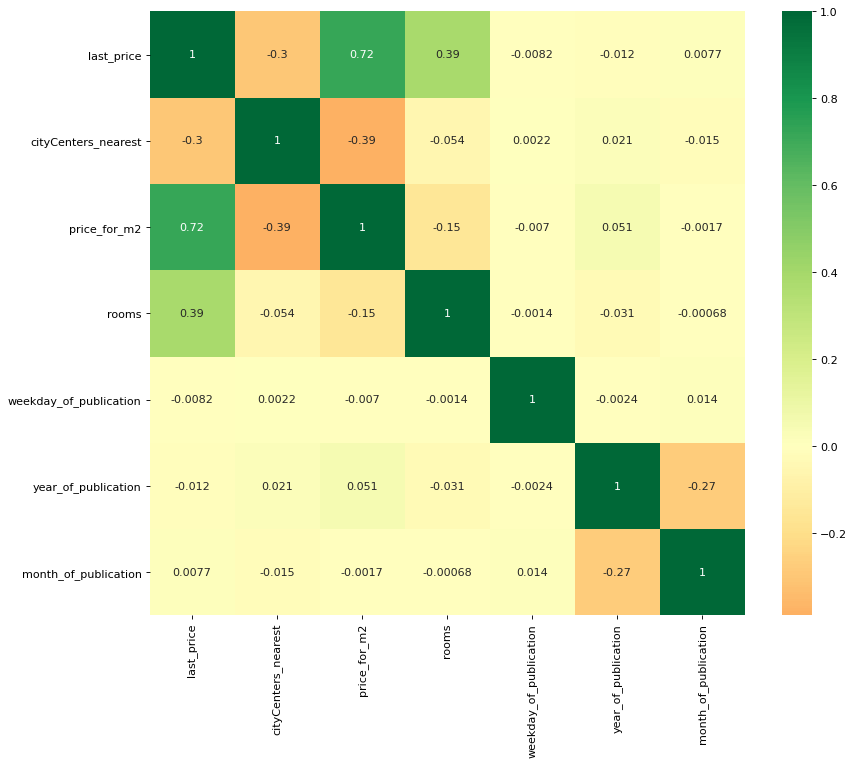

In [74]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr_df.corr(), xticklabels=corr_df.corr().columns,\
            yticklabels=corr_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Отвечая на наш предыдущий вопрос можем заметить, что цена зависит от цены за квадратный метр слишком очевидна, так же можем заметить, что есть небольшая зависимость от колличества комнат, но опять же вполне логично, что если много комнат, то соотвественно больше квадратных метров, а чем больше квадратных метров, то тем больше цена. Но так же, что не особо зависит от даты размещения. Так же, небольшая отрицательная корреляция при удалённости от центра, т.е. можем сделать вывод, что чем меньше расстояния до центра, тем больше стоимость квартиры, но с этим моментом мы поработаем в дальнейшем получше. Заметим, что в нашей таблице не отобразилось зависит ли цена от этажа, поэтому посмотрим отдельно. Для этого возьмём среднюю цену каждого типа этажа и посмотрим есть ли разница между ними.

[Text(0, 0.5, 'цена за квартиру'), Text(0.5, 0, 'тип этажа')]

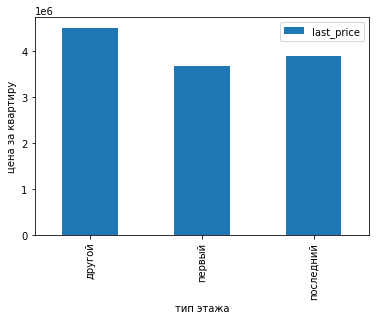

In [75]:
good_df.pivot_table(index='type_floor', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='тип этажа')

Взяв медианное значение можно заметить, что на первом этаже стоимость квартир всегда ниже нежели на последнем или каком-либо другом

In [76]:
Peter_town = good_df.query('locality_name == "Санкт-Петербург"')

In [77]:
Peter_town['center_city_km'] = Peter_town['cityCenters_nearest'] / 1000

In [78]:
Peter_town['center_city_km'] = Peter_town.center_city_km.round(0)

In [79]:
Peter_town_df = Peter_town.pivot_table(index='center_city_km', values='last_price', aggfunc='median')

<AxesSubplot:xlabel='center_city_km'>

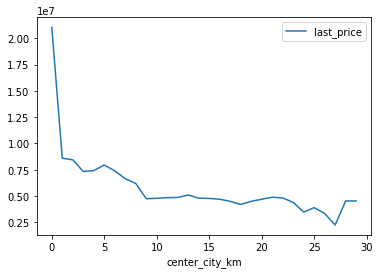

In [80]:
Peter_town_df.plot()

Ну что и требовалось доказать. Чем ближе к центру, тем дороже квартиры. Посмотрим теперь где наш центр заканчивается. Обратим внимание, что ~ на 8-м километре цена резко падает вниз. Посмотрим на нашу свобдную таблицу, чтобы убедиться в этом.

In [81]:
Peter_town_df.head(15)

,last_price
center_city_km,
0.0,21039278.0
1.0,8600000.0
2.0,8445000.0
3.0,7335000.0
4.0,7425000.0
5.0,7952112.0
6.0,7400000.0
7.0,6650000.0
8.0,6200000.0


Так и есть, цена на 8-м километре составляет 7.4 млн, а после резко падает до 5 млн.руб.

Теперь, отберём 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра и выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [82]:
top_10 = good_df.pivot_table(index='locality_name', values='price_for_m2', aggfunc=['count', 'median', 'mean'])
top_10.columns = ('count', 'median', 'mean')

In [83]:
top_10.sort_values('count', ascending=False).head(10)

,count,median,mean
locality_name,,,
Санкт-Петербург,12566,102564.0,107691.351584
посёлок Мурино,515,85714.0,85685.229126
посёлок Шушары,433,76666.0,78548.593533
Всеволожск,381,65789.0,68615.023622
посёлок Парголово,326,91779.5,90333.165644
Колпино,316,74866.5,75563.841772
Пушкин,308,98482.0,101004.360390
деревня Кудрово,296,91930.0,92487.101351
Гатчина,285,67647.0,68602.982456


Итак, теперь можно сделать вывод, что:

    1. В Санкт - Петербуре самое большое колличество объявлений и самый высокий ценник за кв.м.
    2. В Выборге наименьшее колличество объявлений и самый низкий ценник за кв.м.

Теперь выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [84]:
Peter_center_town = Peter_town.query('center_city_km <= 8')

Text(0, 0.5, 'колличество объявлений')

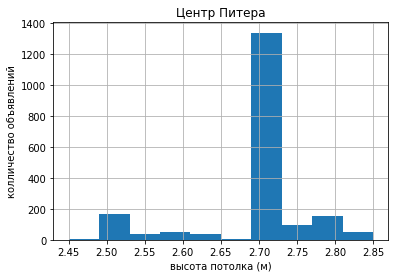

In [85]:
ax = Peter_center_town.ceiling_height.hist()
ax.set_title('Центр Питера')
ax.set_xlabel('высота потолка (м)')
ax.set_ylabel('колличество объявлений')


[Text(0.5, 0, 'высота потолка (м)'), Text(0.5, 1.0, 'Центр Питера')]

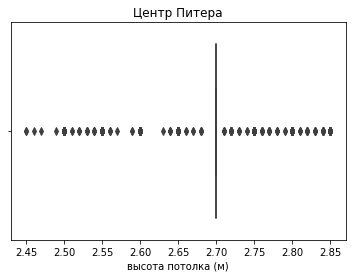

In [86]:
sns.boxplot(Peter_center_town.ceiling_height).set(xlabel='высота потолка (м)', title='Центр Питера')

In [87]:
Peter_center_town.groupby('category_price', as_index=False)[['last_price']]\
    .count().sort_values('last_price', ascending=False)\
    .style.bar()

,category_price,last_price
5,свыше 7 млн,1030
4,от 5 до 6 млн,262
3,от 4 до 5 млн,192
2,от 3 до 4 млн,126
1,от 2 до 3 млн,21
0,от 1 до 2 млн,2


Text(0, 0.5, 'колличество объявлений')

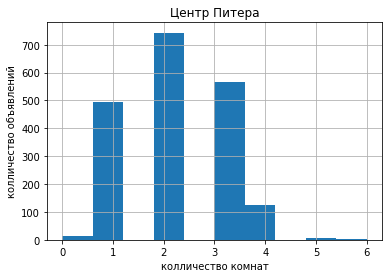

In [88]:
ax = Peter_center_town.rooms.hist()
ax.set_title('Центр Питера')
ax.set_xlabel('колличество комнат')
ax.set_ylabel('колличество объявлений')

[Text(0.5, 0, 'Комнаты'), Text(0.5, 1.0, 'Центр Питера')]

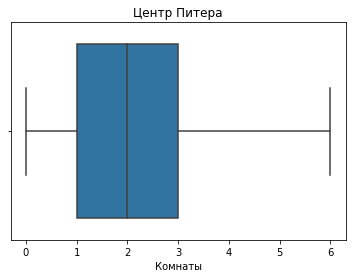

In [89]:
sns.boxplot(Peter_center_town.rooms).set(xlabel='Комнаты', title='Центр Питера')

Text(0, 0.5, 'колличество объявлений')

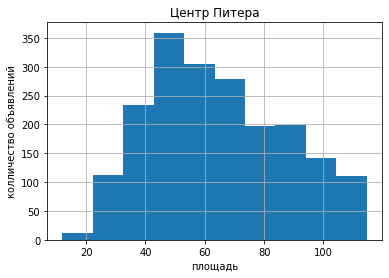

In [90]:
ax = Peter_center_town.total_area.hist()
ax.set_title('Центр Питера')
ax.set_xlabel('площадь')
ax.set_ylabel('колличество объявлений')

[Text(0.5, 0, 'площадь'), Text(0.5, 1.0, 'Центр Питера')]

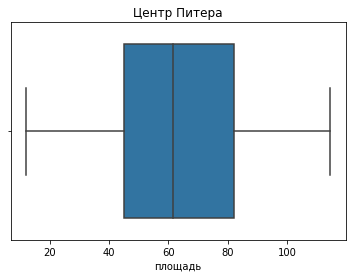

In [91]:
sns.boxplot(Peter_center_town.total_area).set(xlabel='площадь', title='Центр Питера')

Сделаем вывод, что в центре Санкт-Петербурга:
    
    1. высота потолка в основном лежит между 2.5 и 2.7
    2. цена квартир в основном свыше 7 млн.
    3. колличество комнат обычно от 2 до 3, а меньше всего студий.
    4. площадь квартир от 50 кв.м до 80 кв.м

In [92]:
corr_Peter_center_town = Peter_center_town[['last_price',\
           'center_city_km',\
           'price_for_m2',\
           'rooms',\
           'weekday_of_publication',\
           'year_of_publication',\
           'month_of_publication',\
           'type_floor'\
           ]]

<AxesSubplot:>

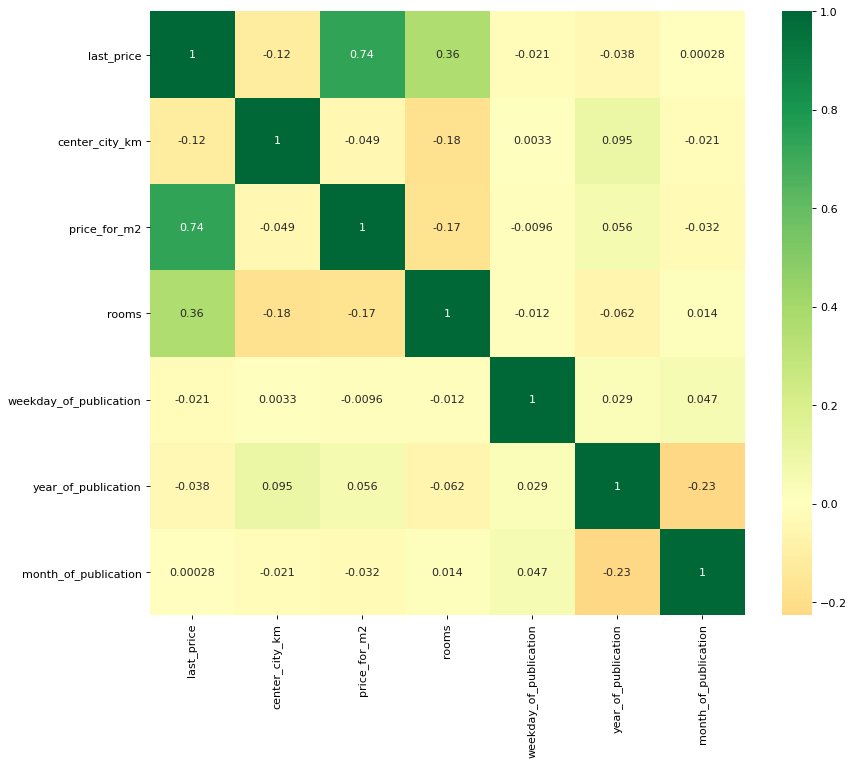

In [93]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(corr_Peter_center_town.corr(), xticklabels=corr_Peter_center_town.corr().columns,\
            yticklabels=corr_Peter_center_town.corr().columns, cmap='RdYlGn', center=0, annot=True)

[Text(0, 0.5, 'цена за квартиру'), Text(0.5, 0, 'тип этажа')]

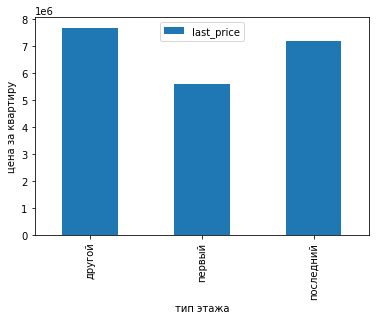

In [94]:
Peter_center_town.pivot_table(index='type_floor', values='last_price', aggfunc='median')\
    .plot.bar().set(ylabel='цена за квартиру', xlabel='тип этажа')


### Шаг 5. Общий вывод

Итак, сделаем вывод, что:

    1. цена квартиры зависит от удалённости от центра города Санкт - Петербурга.
    2. квартиры на первом этаже обычно дешевле, чем на других этажах.
    3. В Санкт - Петербурге самые дорогие квартиры по сравнению с областью, а самые дешевые в Выборге.
    4. что в области, что в центре города больше всего квартир с площадью от 50 до 100 кв.м
    5. В центре города в основном лидируют 2 или 3 комнатные квартиры, но не очень востребованы студии по стравнению с другими частями города или области.
    6. Цена не зависит от года, месяца или дня недели публикации.